# Workflow for a hydrogen infrastructure analysis on spatial scale 

In this application, a spatially resolved hydrogen infrastructure is modeled to analyze differen hydrogen supply chains with spatial resolution.

The workflow is structured as follows:
1. Import relevant modules / tools / packages
2. Data Import and Manipulation
3. Prepare demand Patterns
4. Methodical Applications    
    4.1 Creation of Distance Matrices    
    4.2 Optimization of pipeline routing    
    4.3 Optimization of truck transmission routing    
    4.4 Optimization of truck distribution routing
5. Definition of supply chains
6. Running the supply chain model
7. Creating Plots and Diagrams

## 1. Import relevant modules / tools

The main techno-economic assumptions are based on Reuß et al. (2019) https://doi.org/10.1016/j.apenergy.2019.04.064 and can be loaded with the $HIM.workflow.scenarioExample$ script

In [1]:
from HIM.workflow.scenarioExample import *

Besides that, different HIM modules have to be imported to have the full utilization available

In [2]:
from HIM import dataHandling as sFun
from HIM import optiSetup as optiFun
from HIM import hscTotal
from HIM import plotFunctions as pFun
from HIM.workflow import preprocFunc as preFun   

## 2. Data Import and Manipulation

To showcase the model, an example dataset is stored on the data folder of the package with randomized Production and Fueling station locations.

"dataPath" is the internal storage folder of the python package. To save into a new folder, please adjust the "pathSave" variable.

In [3]:
dataPathExample=path.join(dataPath,"HSCExampleInputs")

In [4]:
pathDist= path.join(dataPathExample,"area")
pathFS = path.join(dataPathExample,"randomFuelingStations")
pathSource = path.join(dataPathExample,"randomSources")
pathGasP = path.join(dataPathExample,"GasGridPoints")
pathStreet= path.join(dataPathExample,"StreetLines")

### Import Demand, Sources and Connections (streets and candidate grid)

In [5]:
District = sFun.import_shp(pathDist, crs=crs, name="C")
District

,vehicles,geometry,intIndex,ID
C0,42321.0,"POLYGON ((527845.3891847082 6073764.748410056,...",0,C0
C1,107982.0,"POLYGON ((577156.386489201 6029965.650990398, ...",1,C1
C2,96030.0,"POLYGON ((623679.4040304357 5980679.433307462,...",2,C2
C3,40776.0,"POLYGON ((566286.5920529336 5999716.891725249,...",3,C3
C4,77783.0,(POLYGON ((504610.3244715404 6023877.016337246...,4,C4
...,...,...,...,...
C395,61213.0,"POLYGON ((659674.4522598374 5633387.880766523,...",395,C395
C396,48605.0,"POLYGON ((689265.583896176 5661007.829775478, ...",396,C396
C397,50214.0,"POLYGON ((699460.9311519954 5630243.151835489,...",397,C397
C398,60093.0,"POLYGON ((723405.7211392096 5652023.815781306,...",398,C398


In [6]:
Fueling = sFun.import_shp(pathFS, crs=crs, name="F")
Fueling

,BAB,GEBIET,geometry,intIndex,ID
F0,0,2,POINT (527858.2270696155 6073091.160381755),0,F0
F1,1,3,POINT (524368.9962398433 6068946.055854724),1,F1
F2,0,3,POINT (524614.3183384173 6068346.522265787),2,F2
F3,0,1,POINT (527813.5521552893 6070579.530434046),3,F3
F4,1,2,POINT (527582.5489159778 6068969.253984731),4,F4
...,...,...,...,...,...
F3995,1,1,POINT (734399.4511373561 5648374.028440299),3995,F3995
F3996,0,2,POINT (745081.5415335472 5656585.868261001),3996,F3996
F3997,1,1,POINT (734761.4932753376 5640009.937420512),3997,F3997
F3998,0,1,POINT (753673.7020128486 5647276.565210268),3998,F3998


In [7]:
Source=sFun.import_shp(pathSource, crs=crs, name="S")
Source

,GEWICHT,geometry,intIndex,ID
S0,0.745269,POINT (807329.2051803777 5879454.424779376),0,S0
S1,1.183619,POINT (745032.4426554898 5601042.468353007),1,S1
S2,1.065628,POINT (752946.6479681777 5594807.012982253),2,S2
S3,1.418932,POINT (566227.8138205109 5679307.68741277),3,S3
S4,0.777321,POINT (549833.2390119273 5600388.153034737),4,S4
S5,1.447561,POINT (421294.3794888862 5698543.766672291),5,S5
S6,1.359717,POINT (790577.6994428602 5683839.247599253),6,S6
S7,0.808762,POINT (691118.9717220902 5580400.928647798),7,S7
S8,1.186028,POINT (680303.7134188523 5805742.649685025),8,S8
S9,1.010495,POINT (385147.9929280511 5804847.009449955),9,S9


In [8]:
NGGridPoint = sFun.import_shp(pathGasP, crs=crs, name="G")
NGGridPoint

,FID,geometry,intIndex,ID
G0,0,POINT (280353.0870717985 5235877.555857685),0,G0
G1,1,POINT (290353.0870717985 5245877.555857685),1,G1
G2,2,POINT (300353.0870717985 5255877.555857685),2,G2
G3,3,POINT (310353.0870717985 5265877.555857685),3,G3
G4,4,POINT (320353.0870717985 5275877.555857685),4,G4
...,...,...,...,...
G1255,1255,POINT (930353.0870717985 5985877.555857685),1255,G1255
G1256,1256,POINT (940353.0870717985 5975877.555857685),1256,G1256
G1257,1257,POINT (950353.0870717985 5965877.555857685),1257,G1257
G1258,1258,POINT (960353.0870717985 5955877.555857685),1258,G1258


In [9]:
(distStreet, StreetsPointsNew) = preFun.importDLMStreets(pathStreet, speed, crs)
distStreet

,inputID,targetID,distance,weightedDistance,time
"(Street0, Street1)",Street0,Street1,10.000000,10.000000,0.333333
"(Street0, Street2)",Street0,Street2,10.000000,10.000000,0.333333
"(Street0, Street3)",Street0,Street3,14.142136,14.142136,0.471405
"(Street0, Street4)",Street0,Street4,14.142136,14.142136,0.471405
"(Street1, Street5)",Street1,Street5,10.000000,10.000000,0.333333
...,...,...,...,...,...
"(Street5804, Street5739)",Street5804,Street5739,14.142136,14.142136,0.471405
"(Street5805, Street5806)",Street5805,Street5806,10.000000,10.000000,0.333333
"(Street5805, Street5871)",Street5805,Street5871,10.000000,10.000000,0.333333
"(Street5805, Street5872)",Street5805,Street5872,14.142136,14.142136,0.471405


For better visualization of the results, we define a standard plotting routine for geospatial plots

In [10]:
def plot_shape(figsize=(7,10), facecolor="white"):
    unary=gpd.GeoSeries([District.unary_union])
    ax=unary.plot(facecolor=facecolor, figsize=figsize)
    ax.xaxis.set_ticklabels(["" for x in ax.xaxis.get_ticklabels()])
    ax.yaxis.set_ticklabels(["" for x in ax.yaxis.get_ticklabels()])
    ax.axis("off")
    ax.set_aspect("equal")
    return ax

## 3. Prepare demand Patterns

First, we match the fueling station locations with the district polygons

In [11]:
spatial_index=Fueling.sindex
for (areaID, areaValue) in District.iterrows():
    possible_matches_index = list(spatial_index.intersection(areaValue["geometry"].bounds))
    possible_matches = Fueling.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(areaValue["geometry"])]
    Fueling.loc[precise_matches.index,"ID_C"]=areaID
    District.loc[areaID, "nFuelStat"]=len(precise_matches.index)

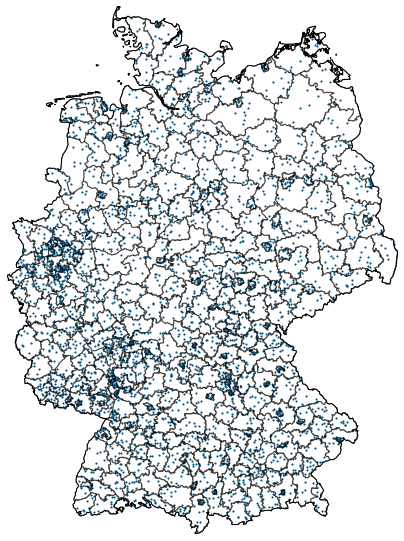

In [12]:
ax=plot_shape()
District.boundary.plot(ax=ax, color="black", alpha=0.5)
Fueling.plot(ax=ax, marker=".", markersize=5)
plt.show()

Second, we prepare a Point-Dataframe by creating the centroids of each polygon area. Afterwards, we calculate the average hydrogen demand per area based on the penetration rate and the existing vehicle distribution. The penetration rate has to be defined in advance and represents the share of FCEV compared to the total fleet size.

In [13]:
penetration=0.25

In [14]:
Centroid=District.copy()
Centroid.geometry=Centroid.centroid
Centroid["FCEV"]=Centroid["vehicles"]*penetration
Centroid["H2Demand_kt"]=Centroid["FCEV"]*specificDemand*mileage*1e-6

Third, we calculate the number of fueling stations necessary in each district by utilizing the demand of each district and comparing it with the target fueling station size

In [15]:
fuelingMax_kt_a=fuelingMax_kg_d/1e6*365
Centroid["minFS"]=np.ceil(Centroid["H2Demand_kt"]/fuelingMax_kt_a)
Centroid["realFS"]=Centroid["nFuelStat"]
Centroid["H2Demand_kt_F"]= Centroid["H2Demand_kt"]/Centroid["minFS"]
Centroid.loc[Centroid["minFS"]==0,["H2Demand_kt_F", "H2Demand_kt"]]=0
District["H2Demand_kt"]=Centroid["H2Demand_kt"].values
totalH2Demand=Centroid["H2Demand_kt"].sum()

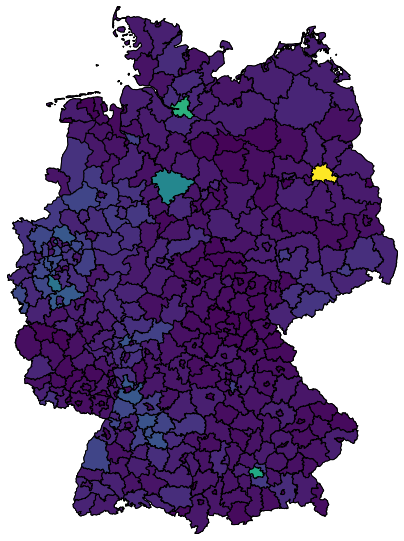

In [16]:
ax=plot_shape()
District.plot(column="H2Demand_kt", ax=ax)
plt.show()

then, we select the fueling stations out of the potential locations

In [17]:
FuelingNew=preFun.getChosenStations(Fueling=Fueling, Centroid=Centroid, weightFtoF=weightFtoF)

C:\Users\m.reuss\Anaconda\envs\him\lib\site-packages\HIM\workflow\preprocFunc.py:213: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  FuelingNew["CentC"]=Centroid.ix[FuelingNew["ID_C"]].geometry.values


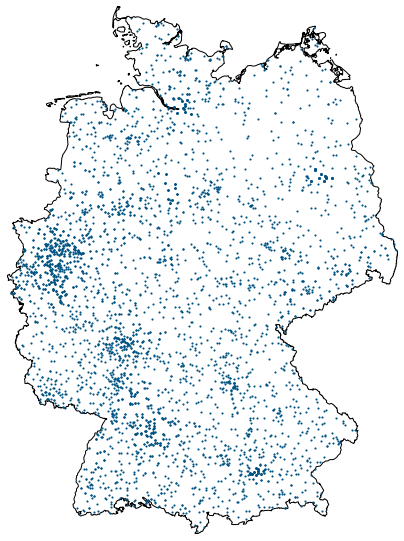

In [18]:
ax=plot_shape()
FuelingNew.plot(ax=ax, marker=".", markersize=5)
plt.show()

### Prepare source capacity

For the sources, we have to set the capacity. To simplify it for this example, we set the total hydrogen demand as maximal capacity.

In [19]:
Source["H2ProdCap_kt"]=totalH2Demand

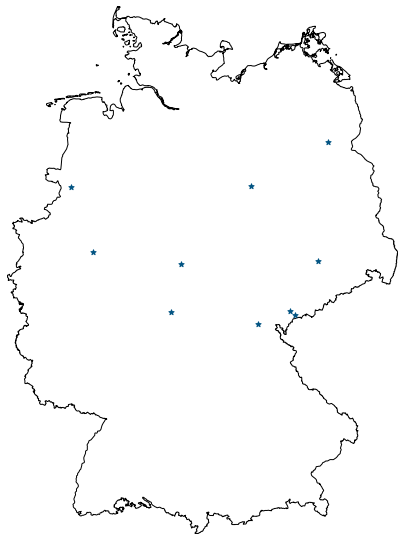

In [20]:
ax=plot_shape()
Source.plot(ax=ax, marker="*", markersize=30)
plt.show()

## Grid data

For the street grid data, the exemplary dummy values are equally distributed points

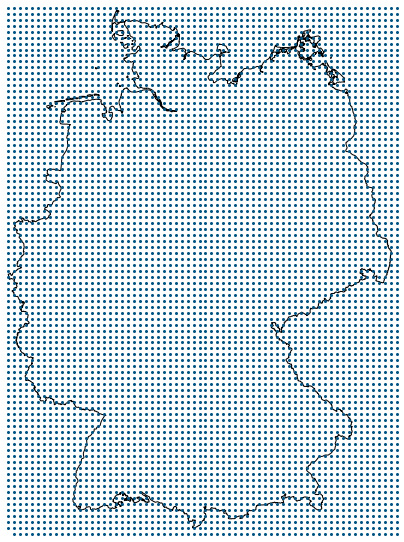

In [21]:
ax=plot_shape()
StreetsPointsNew.plot(ax=ax, marker=".")
plt.show()

The dummy values for the existing natural gas are as well fixed data points

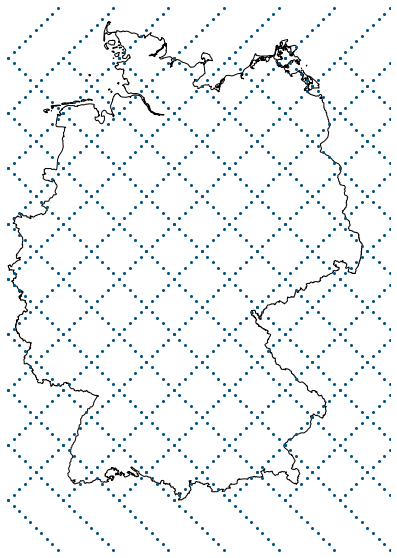

In [22]:
ax=plot_shape()
NGGridPoint.plot(ax=ax, marker=".")
plt.show()

### Clustering

To avoid the overestimation of transmission pipelines, we cluster the fueling stations and separate them from political boundaries

In [23]:
if clustering:
    Cluster=sFun.createCluster(FuelingNew, clusterSize)
    Cluster.crs=Centroid.crs
    FuelingNew["weightedDistance"]=[weightFtoF[values["areaID"]]*values["distToCl"] for key, values in FuelingNew.iterrows()]
else:
    Cluster=Centroid.copy()
    FuelingNew["distToCl"]=FuelingNew["distToC"]
    FuelingNew["ClusterID"]=FuelingNew["ID_C"]

# 4. Methods

## 4.1 Methods - Distance Matrices generation

For pipeline: different matrices necessary compared to the truck routing --> potential network + weight factor!

In [24]:
#Prepare coordinates
pipeCoords=Cluster.geometry.append(Source.geometry).append(NGGridPoint.geometry).append(FuelingNew.geometry)
truckCoords=Source.geometry.append(FuelingNew.geometry).append(StreetsPointsNew.geometry).append(Cluster.geometry)

if the gas grid is available as linestring data and know for usage, the distGtoG can be created directly from the gas grid data without setting up a new matrix. SInce we have just points give, we create the distance matrix via euclidian distances of near neighbours

In [25]:
distGtoG=sFun.selfDistMatrix(NGGridPoint, weight=1.0, kNN=4)

In [26]:
distMatTruck, distMatTruck2, distMatPipeline=preFun.getDistanceMatrices(Cluster,
                                                                        Source,
                                                                        FuelingNew,
                                                                        NGGridPoint,
                                                                        StreetsPointsNew,
                                                                        distStreet,distGtoG,
                                                                        weightFtoF,
                                                                        detourFactorTruck,
                                                                        beeline,
                                                                        speed,
                                                                        clustering=clustering,
                                                                        clusterSize=clusterSize,
                                                                        kNN=5,
                                                                        kNNGas=5) 

## 4.2 Optimization of Pipeline Routing

Initializing the graph and adding nodes/edges with empty capacity, maximum production, real production and real demand. Afterwards, we apply the maximum capacity and the demand of the fueling stations to the nodes.

In [27]:
GraphPipeline=optiFun.PipeNetWork()
GraphPipeline.initializeEdges(distMatPipeline)

nx.set_node_attributes(GraphPipeline, "productionMax", Source.H2ProdCap_kt.to_dict())
nx.set_node_attributes(GraphPipeline, "demand", FuelingNew["H2Demand_kt_F"].to_dict())

If our Graph is ready, we have to decide, which solving options we want to choose. For this example, we choose to use a linear representation of the pipeline flow-cost relation to select the topolgy

In [28]:
GraphPipeline.initOpti(linear=True)

After the initialization, we can run the model

In [29]:
GraphPipeline.optModel()

Academic license - for non-commercial use only
Read LP format model from file C:\Users\MAA60~1.REU\AppData\Local\Temp\tmpwny1cmuq.pyomo.lp
Reading time = 0.36 seconds
x98279: 41877 rows, 98279 columns, 227493 nonzeros
Changed value of parameter MIPgap to 0.005
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Changed value of parameter timeLimit to 2000.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter logfile to GurobiLog.txt
   Prev: gurobi.log  Default: 
Changed value of parameter threads to 7
   Prev: 0  Min: 0  Max: 1024  Default: 0
Changed value of parameter Heuristics to 0.5
   Prev: 0.05  Min: 0.0  Max: 1.0  Default: 0.05
Optimize a model with 41877 rows, 98279 columns and 227493 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 5e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-01, 1e+03]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only.

During the postprocessing, we calculate the costs based on a quadratic diameter-cost relation

In [30]:
#Extract results
productionPipeline=GraphPipeline.getProductionNodes()
resultsEdgesPipeline=GraphPipeline.getEdgesAsGpd(pipeCoords, "pipeline")
Source["pipe_kt_a"]=productionPipeline
Source["pipe_kg_d"]=Source["pipe_kt_a"]*1e6/365

## 4.3 Optimization of Truck Transmission Routing

Similar to the pipeline routing, we have to create first a Graph of the model

In [31]:
GraphTruck=optiFun.PipeNetWork()
GraphTruck.initializeEdges(distMatTruck)

nx.set_node_attributes(GraphTruck, "productionMax", Source.H2ProdCap_kt.to_dict())
nx.set_node_attributes(GraphTruck, "demand", FuelingNew["H2Demand_kt_F"].to_dict())

We reduce the network size since especially streets grids have a high resolution with lots of single nodes to improve the solving performance

In [32]:
GraphTruck.reduceNetworkSize()

Next, we initialize the optimization by defining the weight. Here, we use the travelled "time" of each edge as option. However, we can as well use e.g. costs or distance, in case the graph knows the values for it-  

In [33]:
#Initializing the optimization
GraphTruck.initOptiTruck(weight=weight)

Next step: Running the model

In [34]:
GraphTruck.optModel()

Academic license - for non-commercial use only
Read LP format model from file C:\Users\MAA60~1.REU\AppData\Local\Temp\tmpseial_8y.pyomo.lp
Reading time = 0.30 seconds
x90406: 46871 rows, 90406 columns, 207599 nonzeros
Changed value of parameter MIPgap to 0.005
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Changed value of parameter timeLimit to 2000.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter logfile to GurobiLog.txt
   Prev: gurobi.log  Default: 
Changed value of parameter threads to 7
   Prev: 0  Min: 0  Max: 1024  Default: 0
Changed value of parameter Heuristics to 0.5
   Prev: 0.05  Min: 0.0  Max: 1.0  Default: 0.05
Optimize a model with 46871 rows, 90406 columns and 207599 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-03, 5e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-01, 1e+03]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only.

And finally, catching the results from the optimization

In [35]:
resultsTruckNodes=GraphTruck.getProductionNodes()
resultsEdgesTruck=GraphTruck.getEdgesAsGpd(truckCoords, "truck")
#%%
Source["truck_kt_a"]=resultsTruckNodes
Source["truck_kg_d"]=Source["truck_kt_a"]*1e6/365
resultsEdgesTruck["edge"]=[not ("Street" in x[0] and "Street" in x[1]) for x in resultsEdgesTruck.index]

## 4.4 Optimization of Truck Distribution Routing

Since we want to have the same system for the distribution option for pipeline/trailer systems, we need to calculate the truck optimization again.

In [36]:
GraphTruck2=optiFun.PipeNetWork()
GraphTruck2.initializeEdges(distMatTruck2)

nx.set_node_attributes(GraphTruck2, "productionMax", Cluster.H2Demand_kt.to_dict())
nx.set_node_attributes(GraphTruck2, "demand", FuelingNew["H2Demand_kt_F"].to_dict())

GraphTruck2.reduceNetworkSize()

GraphTruck2.initOptiTruck(weight=weight)

GraphTruck2.optModel()

resultsEdgesTruck2=GraphTruck2.getEdgesAsGpd(truckCoords, "truck")
resultsEdgesTruck2["H2Demand_kg_d_F"]=resultsEdgesTruck2["capacity"]*1e6/365

resultsEdgesTruck2["edge"]=[not ("Street" in x[0] and "Street" in x[1]) for x in resultsEdgesTruck2.index]

Academic license - for non-commercial use only
Read LP format model from file C:\Users\MAA60~1.REU\AppData\Local\Temp\tmpebpsio2_.pyomo.lp
Reading time = 0.37 seconds
x90534: 46967 rows, 90534 columns, 207887 nonzeros
Changed value of parameter MIPgap to 0.005
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Changed value of parameter timeLimit to 2000.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter logfile to GurobiLog.txt
   Prev: gurobi.log  Default: 
Changed value of parameter threads to 7
   Prev: 0  Min: 0  Max: 1024  Default: 0
Changed value of parameter Heuristics to 0.5
   Prev: 0.05  Min: 0.0  Max: 1.0  Default: 0.05
Optimize a model with 46967 rows, 90534 columns and 207887 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-03, 5e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-01, 5e+01]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only.

# 5. Definition of supply chains

First, we have to design the pathways

In [37]:
hscPathways={}
hscPathways["pipeline"]=[["Electrolyzer","None","Compressor", "GH2-Cavern","None","Compressor","Pipeline","Compressor","GH2-Truck","GH2 (Trailer)"],
                         ["Electrolyzer","None","Compressor", "GH2-Cavern","None","Compressor","Pipeline","None","Pipeline","GH2 (Pipeline)"]]

hscPathways["truck"]=[["Electrolyzer","None","Compressor", "GH2-Cavern","None","Compressor","GH2-Truck","None","None","GH2 (Trailer)"],
                      ["Electrolyzer","None","Compressor", "GH2-Cavern","None","Liquefaction","LH2-Truck","None","None","LH2"],
                      ["Electrolyzer","None","Compressor", "GH2-Cavern","None","Hydrogenation","LOHC-Truck","None","None","LOHC (NG)"],
                      ["Electrolyzer","Liquefaction","None", "LH2-Tank","None","None","LH2-Truck","None","None","LH2"],
                      ["Electrolyzer","Hydrogenation","None", "LOHC-Tank","None","None","LOHC-Truck","None","None","LOHC (NG)"]]

Since we have two transport system, we have to divide between transmission and distribution for all options and set the right dataframe

In [38]:
pipelineDistance=[resultsEdgesPipeline[resultsEdgesPipeline["distribution"]==False],
                  resultsEdgesPipeline[resultsEdgesPipeline["distribution"]]]

truckDistance=[resultsEdgesTruck,
               resultsEdgesTruck2]

sourceDf={"pipeline":Source["pipe_kg_d"],
          "truck":Source["truck_kg_d"]}

# 6. Running the supply chain model

Finally, we can run the Resultmanager

In [39]:
Results={}
i=0
for hscPathwayType in sorted(hscPathways.keys()):
    listCapacities=[sourceDf[hscPathwayType],
                    sourceDf[hscPathwayType],
                    sourceDf[hscPathwayType],
                    sourceDf[hscPathwayType],
                    sourceDf[hscPathwayType],
                    sourceDf[hscPathwayType],
                    resultsEdgesTruck["capacity"].values*1e6/365,
                    Cluster["H2Demand_kt"]*1e6/365,
                    resultsEdgesTruck2["H2Demand_kg_d_F"],
                    FuelingNew["H2Demand_kg_d_F"]]
    for listHSC in hscPathways[hscPathwayType]:
        cumCost=0

        Results[i]=hscTotal.HSC(listHSC,
                                 dfTable,
                                 listCapacities,
                                 totalH2Demand*1e6,
                                 truckDistance=truckDistance,
                                 pipelineDistance=pipelineDistance,
                                 targetCars=0,
                                 beeline=beeline)

        Results[i].calcHSC(cumCost=cumCost)
        display(Results[i].dfHSCRes)
        i+=1

,TOTEX,CAPEX,fixOPEX,varOPEX,invest,cumCost,technology,nTrucks,pipeLength,Loss,electricityRES,electricityGrid,NaturalGas,Diesel,overCapacity,CO2Emissions[kg/kg],primaryEnergy[MJ/kg]
Production,3.7002,0.6695,0.1348,2.8960,4.534736e+09,3.7002,Electrolyzer,0.0000,0.0000,0.0000,47.6000,0.0000,0.0,0.0000,1.0166,0.0000,174.2042
Connector1,0.0000,0.0000,0.0000,0.0000,0.000000e+00,3.7002,None,0.0000,0.0000,1.0000,0.0000,0.0000,0.0,0.0000,1.0166,0.0000,0.0000
Connector2,0.0375,0.0118,0.0040,0.0216,1.021532e+08,3.7377,Compressor,0.0000,0.0000,1.0015,0.2675,0.0000,0.0,0.0000,1.0151,0.0000,0.9775
Storage,0.2064,0.1684,0.0379,0.0000,1.914200e+09,3.9440,GH2-Cavern,0.0000,0.0000,1.0000,0.0000,0.0000,0.0,0.0000,1.0151,0.0000,0.0000
Connector3,0.0000,0.0000,0.0000,0.0000,0.000000e+00,3.9440,None,0.0000,0.0000,1.0000,0.0000,0.0000,0.0,0.0000,1.0151,0.0000,0.0000
Connector4,0.0439,0.0051,0.0017,0.0371,4.408108e+07,3.9879,Compressor,0.0000,0.0000,1.0050,0.0000,0.2570,0.0,0.0000,1.0100,0.0317,1.3085
Transport1,0.1918,0.1663,0.0255,0.0000,2.002044e+09,4.1798,Pipeline,0.0000,5150.7761,1.0000,0.0000,0.0000,0.0,0.0000,1.0100,0.0000,0.0000
Connector5,0.1310,0.0279,0.0095,0.0936,2.408675e+08,4.3108,Compressor,0.0000,0.0000,1.0050,0.0000,1.0979,0.0,0.0000,1.0050,0.1346,5.5609
Transport2,0.5818,0.3017,0.2331,0.0471,2.163466e+09,4.8926,GH2-Truck,2638.3732,0.0000,1.0000,0.0000,0.0000,0.0,0.2008,1.0050,0.0642,0.8717
Station,1.5038,1.0208,0.2758,0.2073,7.215221e+09,6.3964,GH2 (Trailer),4158.0000,0.0000,1.0050,0.0000,1.6000,0.0,0.0000,1.0000,0.1952,8.0640


,TOTEX,CAPEX,fixOPEX,varOPEX,invest,cumCost,technology,nTrucks,pipeLength,Loss,electricityRES,electricityGrid,NaturalGas,Diesel,overCapacity,CO2Emissions[kg/kg],primaryEnergy[MJ/kg]
Production,3.7002,0.6695,0.1348,2.8960,4.534736e+09,3.7002,Electrolyzer,0.0,0.0000,0.0000,47.6000,0.000,0.0,0.0,1.0115,0.0000,173.3375
Connector1,0.0000,0.0000,0.0000,0.0000,0.000000e+00,3.7002,None,0.0,0.0000,1.0000,0.0000,0.000,0.0,0.0,1.0115,0.0000,0.0000
Connector2,0.0375,0.0118,0.0040,0.0216,1.021532e+08,3.7377,Compressor,0.0,0.0000,1.0015,0.2675,0.000,0.0,0.0,1.0100,0.0000,0.9727
Storage,0.2064,0.1684,0.0379,0.0000,1.914200e+09,3.9440,GH2-Cavern,0.0,0.0000,1.0000,0.0000,0.000,0.0,0.0,1.0100,0.0000,0.0000
Connector3,0.0000,0.0000,0.0000,0.0000,0.000000e+00,3.9440,None,0.0,0.0000,1.0000,0.0000,0.000,0.0,0.0,1.0100,0.0000,0.0000
Connector4,0.0439,0.0051,0.0017,0.0371,4.408108e+07,3.9879,Compressor,0.0,0.0000,1.0050,0.0000,0.257,0.0,0.0,1.0050,0.0315,1.3020
Transport1,0.1918,0.1663,0.0255,0.0000,2.002044e+09,4.1798,Pipeline,0.0,5150.7761,1.0000,0.0000,0.000,0.0,0.0,1.0050,0.0000,0.0000
Connector5,0.0000,0.0000,0.0000,0.0000,0.000000e+00,4.1798,None,0.0,0.0000,1.0000,0.0000,0.000,0.0,0.0,1.0050,0.0000,0.0000
Transport2,3.3588,2.8721,0.4867,0.0000,3.457415e+10,7.5386,Pipeline,0.0,98262.9360,1.0000,0.0000,0.000,0.0,0.0,1.0050,0.0000,0.0000
Station,1.4282,0.8800,0.2953,0.2529,5.961254e+09,8.9668,GH2 (Pipeline),0.0,0.0000,1.0050,0.0000,2.000,0.0,0.0,1.0000,0.2440,10.0800


,TOTEX,CAPEX,fixOPEX,varOPEX,invest,cumCost,technology,nTrucks,pipeLength,Loss,electricityRES,electricityGrid,NaturalGas,Diesel,overCapacity,CO2Emissions[kg/kg],primaryEnergy[MJ/kg]
Production,3.7002,0.6695,0.1348,2.8960,4.534736e+09,3.7002,Electrolyzer,0.0000,0,0.0000,47.6000,0.000,0.0,0.0000,1.0115,0.0000,173.3375
Connector1,0.0000,0.0000,0.0000,0.0000,0.000000e+00,3.7002,None,0.0000,0,1.0000,0.0000,0.000,0.0,0.0000,1.0115,0.0000,0.0000
Connector2,0.0379,0.0121,0.0042,0.0216,1.047711e+08,3.7381,Compressor,0.0000,0,1.0015,0.2675,0.000,0.0,0.0000,1.0100,0.0000,0.9726
Storage,0.2172,0.1773,0.0399,0.0000,2.014800e+09,3.9553,GH2-Cavern,0.0000,0,1.0000,0.0000,0.000,0.0,0.0000,1.0100,0.0000,0.0000
Connector3,0.0000,0.0000,0.0000,0.0000,0.000000e+00,3.9553,None,0.0000,0,1.0000,0.0000,0.000,0.0,0.0000,1.0100,0.0000,0.0000
Connector4,0.1138,0.0160,0.0055,0.0923,1.381965e+08,4.0691,Compressor,0.0000,0,1.0050,0.0000,1.193,0.0,0.0000,1.0050,0.1463,6.0426
Transport,1.3215,0.6540,0.5055,0.1620,4.690669e+09,5.3906,GH2-Truck,5720.3281,0,1.0000,0.0000,0.000,0.0,0.6912,1.0050,0.2209,3.0008
Connector5,0.0000,0.0000,0.0000,0.0000,0.000000e+00,5.3906,None,0.0000,0,1.0000,0.0000,0.000,0.0,0.0000,1.0050,0.0000,0.0000
Connector6,0.0000,0.0000,0.0000,0.0000,0.000000e+00,5.3906,None,0.0000,0,1.0000,0.0000,0.000,0.0,0.0000,1.0050,0.0000,0.0000
Station,1.5063,1.0208,0.2758,0.2098,7.215221e+09,6.8969,GH2 (Trailer),4158.0000,0,1.0050,0.0000,1.600,0.0,0.0000,1.0000,0.1952,8.0640


,TOTEX,CAPEX,fixOPEX,varOPEX,invest,cumCost,technology,nTrucks,pipeLength,Loss,electricityRES,electricityGrid,NaturalGas,Diesel,overCapacity,CO2Emissions[kg/kg],primaryEnergy[MJ/kg]
Production,3.7002,0.6695,0.1348,2.8960,4.534736e+09,3.7002,Electrolyzer,0.0000,0,0.0000,47.6000,0.00,0.0,0.0000,1.0486,0.0000,179.6822
Connector1,0.0000,0.0000,0.0000,0.0000,0.000000e+00,3.7002,None,0.0000,0,1.0000,0.0000,0.00,0.0,0.0000,1.0486,0.0000,0.0000
Connector2,0.0379,0.0121,0.0042,0.0216,1.047711e+08,3.7381,Compressor,0.0000,0,1.0015,0.2675,0.00,0.0,0.0000,1.0470,0.0000,1.0082
Storage,0.2172,0.1773,0.0399,0.0000,2.014800e+09,3.9553,GH2-Cavern,0.0000,0,1.0000,0.0000,0.00,0.0,0.0000,1.0470,0.0000,0.0000
Connector3,0.0000,0.0000,0.0000,0.0000,0.000000e+00,3.9553,None,0.0000,0,1.0000,0.0000,0.00,0.0,0.0000,1.0470,0.0000,0.0000
Connector4,0.8970,0.3051,0.1198,0.4721,3.024206e+09,4.8523,Liquefaction,0.0000,0,1.0165,0.0000,6.78,0.0,0.0000,1.0300,0.8520,35.1963
Transport,0.4572,0.2553,0.1604,0.0414,1.851800e+09,5.3095,LH2-Truck,1815.4898,0,1.0000,0.0000,0.00,0.0,0.1768,1.0300,0.0579,0.7867
Connector5,0.0000,0.0000,0.0000,0.0000,0.000000e+00,5.3095,None,0.0000,0,1.0000,0.0000,0.00,0.0,0.0000,1.0300,0.0000,0.0000
Connector6,0.0000,0.0000,0.0000,0.0000,0.000000e+00,5.3095,None,0.0000,0,1.0000,0.0000,0.00,0.0,0.0000,1.0300,0.0000,0.0000
Station,1.3601,0.8478,0.2844,0.2278,5.742801e+09,6.6695,LH2,0.0000,0,1.0300,0.0000,0.60,0.0,0.0000,1.0000,0.0732,3.0240


,TOTEX,CAPEX,fixOPEX,varOPEX,invest,cumCost,technology,nTrucks,pipeLength,Loss,electricityRES,electricityGrid,NaturalGas,Diesel,overCapacity,CO2Emissions[kg/kg],primaryEnergy[MJ/kg]
Production,3.7002,0.6695,0.1348,2.8960,4.534736e+09,3.7002,Electrolyzer,0.0000,0,0.0000,47.6000,0.00,0.0,0.0000,1.0166,0.0000,174.1999
Connector1,0.0000,0.0000,0.0000,0.0000,0.000000e+00,3.7002,None,0.0000,0,1.0000,0.0000,0.00,0.0,0.0000,1.0166,0.0000,0.0000
Connector2,0.0379,0.0121,0.0042,0.0216,1.047711e+08,3.7381,Compressor,0.0000,0,1.0015,0.2675,0.00,0.0,0.0000,1.0150,0.0000,0.9775
Storage,0.2172,0.1773,0.0399,0.0000,2.014800e+09,3.9553,GH2-Cavern,0.0000,0,1.0000,0.0000,0.00,0.0,0.0000,1.0150,0.0000,0.0000
Connector3,0.0000,0.0000,0.0000,0.0000,0.000000e+00,3.9553,None,0.0000,0,1.0000,0.0000,0.00,0.0,0.0000,1.0150,0.0000,0.0000
Connector4,0.1092,0.0356,0.0105,0.0631,3.528460e+08,4.0645,Hydrogenation,0.0000,0,1.0100,0.0000,0.37,0.0,0.0000,1.0050,0.0454,1.8741
Transport,0.6369,0.1837,0.3432,0.1100,1.204094e+09,4.7014,LOHC-Truck,3884.1734,0,1.0000,0.0000,0.00,0.0,0.4693,1.0050,0.1500,2.0376
Connector5,0.0000,0.0000,0.0000,0.0000,0.000000e+00,4.7014,None,0.0000,0,1.0000,0.0000,0.00,0.0,0.0000,1.0050,0.0000,0.0000
Connector6,0.0000,0.0000,0.0000,0.0000,0.000000e+00,4.7014,None,0.0000,0,1.0000,0.0000,0.00,0.0,0.0000,1.0050,0.0000,0.0000
Station,2.9035,1.4474,0.4856,0.9705,9.804583e+09,7.6049,LOHC (NG),0.0000,0,1.0050,0.0000,4.40,11.7,0.0000,1.0000,3.3214,68.5080


,TOTEX,CAPEX,fixOPEX,varOPEX,invest,cumCost,technology,nTrucks,pipeLength,Loss,electricityRES,electricityGrid,NaturalGas,Diesel,overCapacity,CO2Emissions[kg/kg],primaryEnergy[MJ/kg]
Production,3.7002,0.6695,0.1348,2.8960,4.534736e+09,3.7002,Electrolyzer,0.0000,0,0.0000,47.60,0.0,0.0,0.0000,1.0526,0.0000,180.3819
Connector1,1.0599,0.4251,0.1670,0.4679,4.213490e+09,4.7601,Liquefaction,0.0000,0,1.0165,6.78,0.0,0.0,0.0000,1.0356,0.0000,25.2760
Connector2,0.0000,0.0000,0.0000,0.0000,0.000000e+00,4.7601,None,0.0000,0,1.0000,0.00,0.0,0.0,0.0000,1.0356,0.0000,0.0000
Storage,0.5864,0.4186,0.0822,0.0857,4.148617e+09,5.3466,LH2-Tank,0.0000,0,1.0054,0.00,0.0,0.0,0.0000,1.0300,0.0000,0.0000
Connector3,0.0000,0.0000,0.0000,0.0000,0.000000e+00,5.3466,None,0.0000,0,1.0000,0.00,0.0,0.0,0.0000,1.0300,0.0000,0.0000
Connector4,0.0000,0.0000,0.0000,0.0000,0.000000e+00,5.3466,None,0.0000,0,1.0000,0.00,0.0,0.0,0.0000,1.0300,0.0000,0.0000
Transport,0.4572,0.2553,0.1604,0.0414,1.851800e+09,5.8037,LH2-Truck,1815.4898,0,1.0000,0.00,0.0,0.0,0.1768,1.0300,0.0579,0.7867
Connector5,0.0000,0.0000,0.0000,0.0000,0.000000e+00,5.8037,None,0.0000,0,1.0000,0.00,0.0,0.0,0.0000,1.0300,0.0000,0.0000
Connector6,0.0000,0.0000,0.0000,0.0000,0.000000e+00,5.8037,None,0.0000,0,1.0000,0.00,0.0,0.0,0.0000,1.0300,0.0000,0.0000
Station,1.3749,0.8478,0.2844,0.2427,5.742801e+09,7.1786,LH2,0.0000,0,1.0300,0.00,0.6,0.0,0.0000,1.0000,0.0732,3.0240


,TOTEX,CAPEX,fixOPEX,varOPEX,invest,cumCost,technology,nTrucks,pipeLength,Loss,electricityRES,electricityGrid,NaturalGas,Diesel,overCapacity,CO2Emissions[kg/kg],primaryEnergy[MJ/kg]
Production,3.7002,0.6695,0.1348,2.8960,4.534736e+09,3.7002,Electrolyzer,0.0000,0,0.000,47.60,0.0,0.0,0.0000,1.015,0.0000,173.9390
Connector1,0.1215,0.0481,0.0142,0.0592,4.770041e+08,3.8217,Hydrogenation,0.0000,0,1.010,0.37,0.0,0.0,0.0000,1.005,0.0000,1.3387
Connector2,0.0000,0.0000,0.0000,0.0000,0.000000e+00,3.8217,None,0.0000,0,1.000,0.00,0.0,0.0,0.0000,1.005,0.0000,0.0000
Storage,1.0015,0.8371,0.1644,0.0000,8.297234e+09,4.8232,LOHC-Tank,0.0000,0,1.000,0.00,0.0,0.0,0.0000,1.005,0.0000,0.0000
Connector3,0.0000,0.0000,0.0000,0.0000,0.000000e+00,4.8232,None,0.0000,0,1.000,0.00,0.0,0.0,0.0000,1.005,0.0000,0.0000
Connector4,0.0000,0.0000,0.0000,0.0000,0.000000e+00,4.8232,None,0.0000,0,1.000,0.00,0.0,0.0,0.0000,1.005,0.0000,0.0000
Transport,0.6369,0.1837,0.3432,0.1100,1.204094e+09,5.4602,LOHC-Truck,3884.1734,0,1.000,0.00,0.0,0.0,0.4693,1.005,0.1500,2.0376
Connector5,0.0000,0.0000,0.0000,0.0000,0.000000e+00,5.4602,None,0.0000,0,1.000,0.00,0.0,0.0,0.0000,1.005,0.0000,0.0000
Connector6,0.0000,0.0000,0.0000,0.0000,0.000000e+00,5.4602,None,0.0000,0,1.000,0.00,0.0,0.0,0.0000,1.005,0.0000,0.0000
Station,2.9073,1.4474,0.4856,0.9743,9.804583e+09,8.3675,LOHC (NG),0.0000,0,1.005,0.00,4.4,11.7,0.0000,1.000,3.3214,68.5080


# 7. Creating Plots and Diagrams

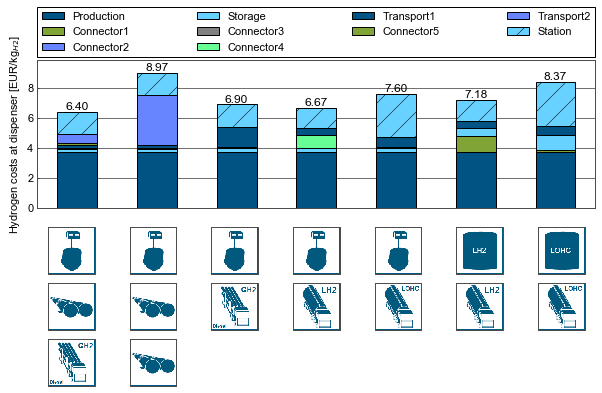

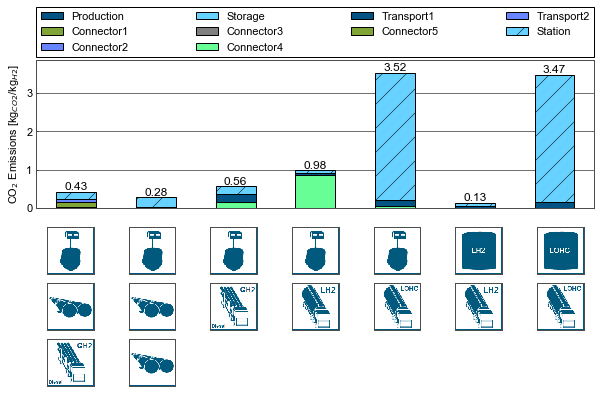

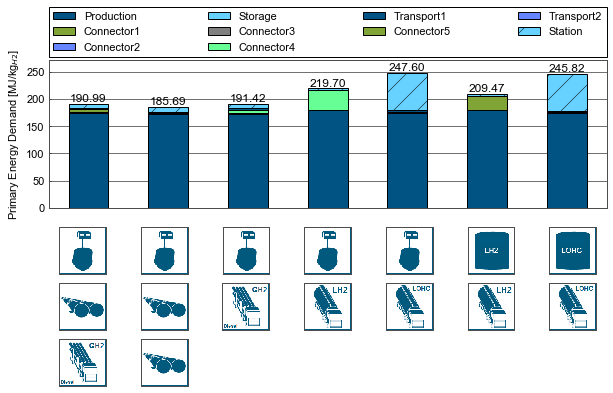

In [40]:
pFun.createPlotsPostProcessing(Results, show=True)

And finally: A georeferenced plot of the resulting transmission/distribution options

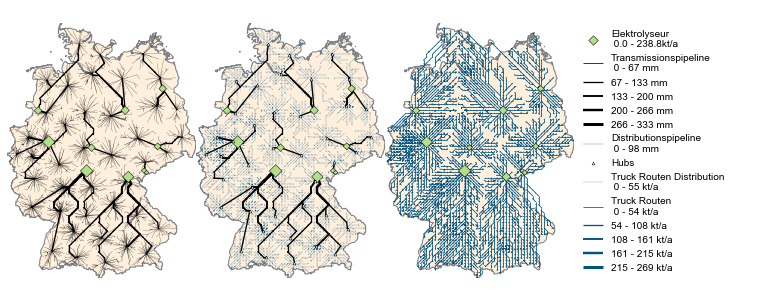

In [41]:
pipeTransmission=resultsEdgesPipeline.loc[~resultsEdgesPipeline["distribution"]]
pipeDistribution=resultsEdgesPipeline.loc[resultsEdgesPipeline["distribution"]]
pFun.plotGISResultsTriplePlot(area=District,
               pipeT=pipeTransmission.copy(),
               pipeD=pipeDistribution.copy(),
               truckT=resultsEdgesTruck.copy(),
               truckD=resultsEdgesTruck2.copy(),
               hub=Cluster,
               source=Source,
               fuel=FuelingNew,
               colorList=colorList)
plt.show()